In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston,load_diabetes
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time
from IPython import display
from sklearn.datasets import make_regression
%matplotlib inline

In [2]:
pre_data = load_boston()
print(type(pre_data))

<class 'sklearn.utils.Bunch'>


In [17]:
headings = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B 1000","LSTAT"]
data = pd.DataFrame(pre_data["data"],columns = headings)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B 1000   506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [20]:
data_norm = (data - data.mean())/data.std()
index = np.linspace(1,506,506).astype(int)
data_norm.insert(0,"id",index,True)
data_norm.head()

,id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT
0,1,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,2,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,3,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,4,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,5,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [21]:
data_norm.describe()

,id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B 1000,LSTAT
count,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,253.500000,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.563575e-15,-1.149882e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16
std,146.213884,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,127.250000,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,253.500000,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,379.750000,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,506.000000,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


In [4]:
target = pd.DataFrame(pre_data["target"],columns = ["MEDV"])
target_norm = (target-target.mean())/target.std()
target_norm.insert(0,"id",index,True)
target_norm.head()

,id,MEDV
0,1,0.159528
1,2,-0.101424
2,3,1.322937
3,4,1.181589
4,5,1.486032


<ul>
<li><p>CRIM     per capita crime rate by town</p></li>
<li><p>ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</p></li>
<li><p>INDUS    proportion of non-retail business acres per town</p></li>
<li><p>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</p></li>
<li><p>NOX      nitric oxides concentration (parts per 10 million)</p></li>
<li><p>RM       average number of rooms per dwelling</p></li>
<li><p>AGE      proportion of owner-occupied units built prior to 1940</p></li>
<li><p>DIS      weighted distances to five Boston employment centres</p></li>
<li><p>RAD      index of accessibility to radial highways</p></li>
<li><p>TAX      full-value property-tax rate per \$10,000</p></li>
<li><p>PTRATIO  pupil-teacher ratio by town</p></li>
<li><p>B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</p></li>
<li><p>LSTAT    % lower status of the population</p></li>
<li><p>MEDV     Median value of owner-occupied homes in $1000’s</p></li>
</ul>

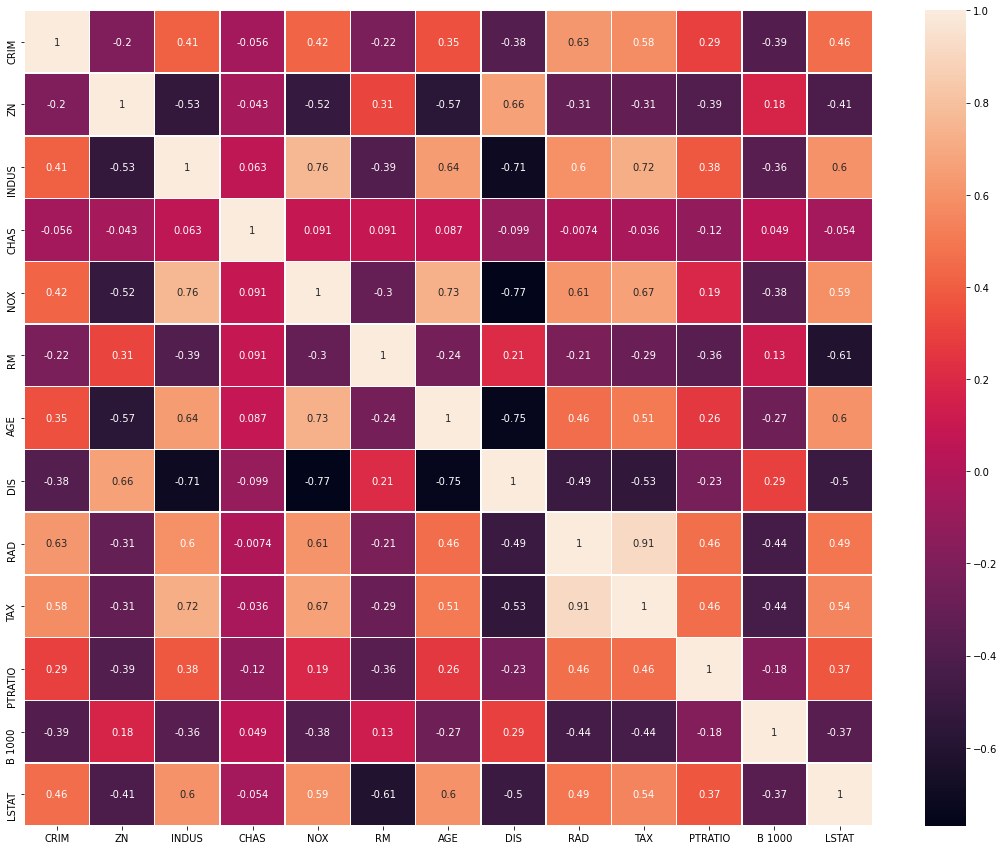

In [36]:
plt.figure(figsize = (19,15))
corr = data.corr()
corr.shape
sns.heatmap(corr,linewidth = 0.5,annot = True)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(data_norm,target_norm,test_size = 0.2)

In [6]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 14) (404, 2)
(102, 14) (102, 2)


In [7]:
mod_data = X_train.iloc[:,1:]
mod_target = Y_train.iloc[:,1:]
model = LinearRegression(fit_intercept = False,normalize = False,copy_X = True).fit(mod_data,mod_target)
print("Mean squared error on train: ",mean_squared_error(model.predict(mod_data),mod_target))
print("Mean squared error on test: ",mean_squared_error(model.predict(X_test.iloc[:,1:]),Y_test.iloc[:,1:]))

Mean squared error on train:  0.2570545525350707
Mean squared error on test:  0.27359563605657344


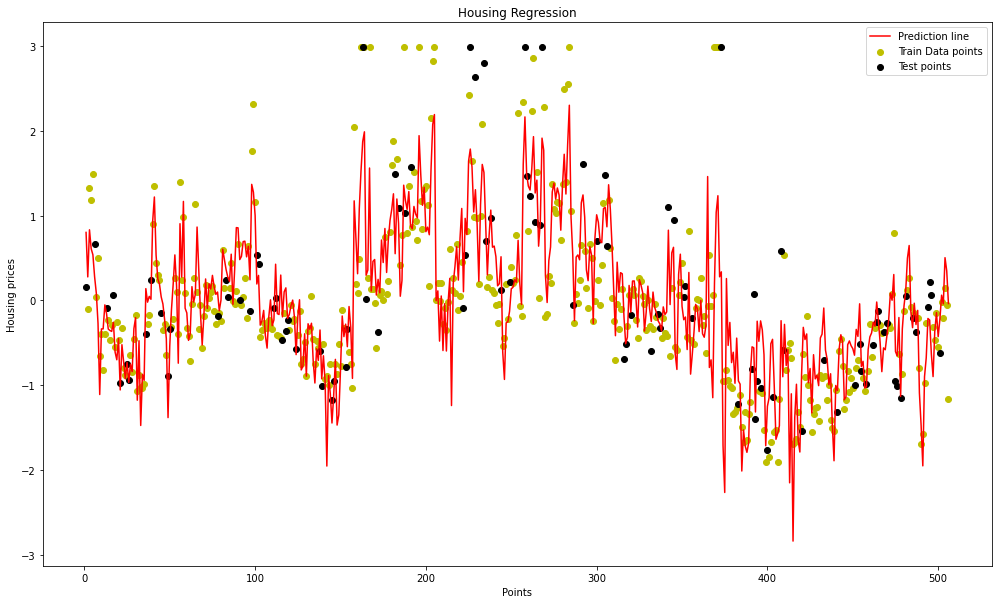

In [8]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)

ax.plot(np.linspace(1,506,506),np.dot(data_norm.iloc[:,1:],model.coef_.T),c = "r",label = "Prediction line")
ax.scatter(X_train["id"],mod_target,c = "y",label = "Train Data points")
ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
ax.legend()
#ax.set_xlim(-100,700)
#ax.set_ylim(-30,70)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
plt.show()

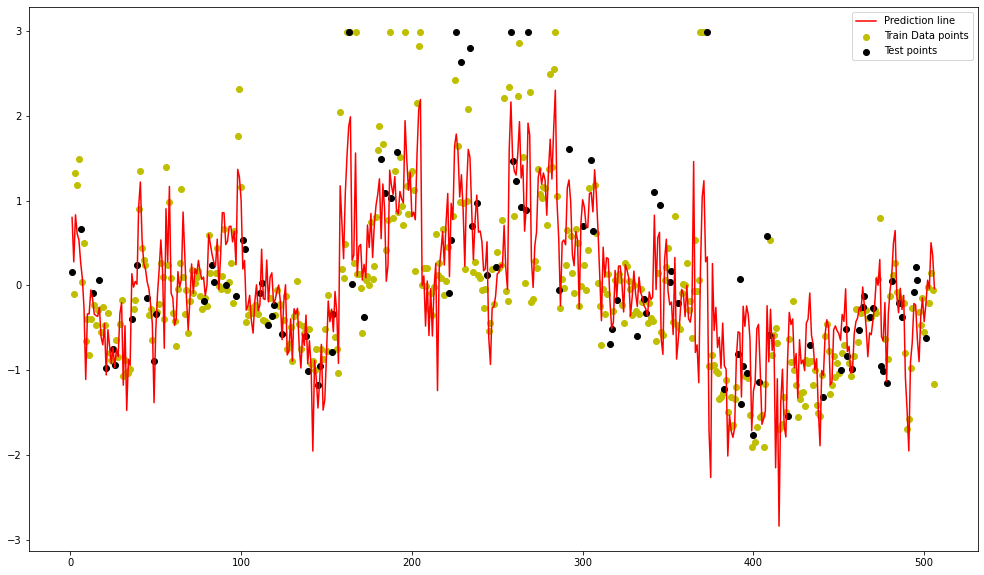

In [9]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
test = list()
train = list()
for feat in range(2,15):
    try:
        model = LinearRegression(fit_intercept = False,normalize = False,copy_X = True).fit(X_train.iloc[:,1:feat],Y_train.iloc[:,1:])
        train.append(mean_squared_error(model.predict(X_train.iloc[:,1:feat]),Y_train.iloc[:,1:]))
        test.append(mean_squared_error(model.predict(X_test.iloc[:,1:feat]),Y_test.iloc[:,1:]))
        plt.cla()
        ax.scatter(X_train["id"],Y_train.iloc[:,1:],c = "y",label = "Train Data points")
        ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
        ax.plot(np.linspace(1,506,506),np.dot(data_norm.iloc[:,1:feat],model.coef_.T),c = "r",label = "Prediction line")
        ax.legend()
        #plt.show()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        #display.display(plt.gcf())  
        time.sleep(1.0)
    except KeyboardInterrupt:
        break
    

,Train MSE,Test MSE
0,0.808374,1.005880
1,0.717783,0.951898
2,0.668048,0.854108
3,0.640028,0.790417
4,0.635000,0.805865
5,0.413000,0.417921
6,0.411376,0.414498
7,0.371725,0.362264
8,0.371189,0.360395
9,0.362143,0.358423


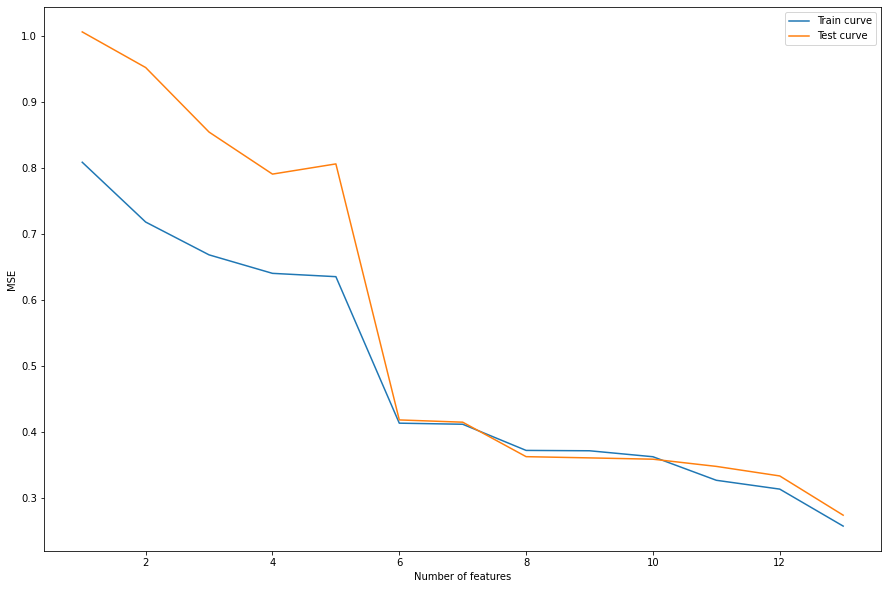

In [10]:
plt.figure(figsize = (15,10))
sns.lineplot(np.linspace(1,len(train),len(train)),train,label = "Train curve")
sns.lineplot(np.linspace(1,len(train),len(train)),test,label = "Test curve")
plt.xlabel("Number of features")
plt.ylabel("MSE")
pd.DataFrame([i for i in zip(train,test)],columns = ["Train MSE","Test MSE"])

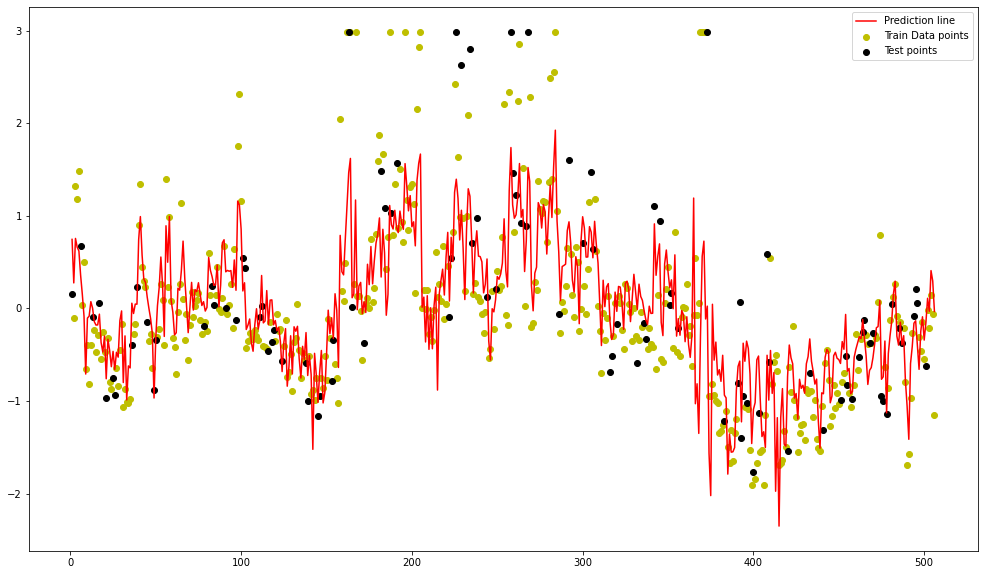

In [11]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
test = list()
train = list()
for feat in range(2,15):
    temp1 = list()
    temp2 = list()
    for alp in [5,1.66666667,50,16.66666667,500,166.66666667]:
        try:
            model = Ridge(alpha = alp,fit_intercept = False,normalize = False,copy_X = True).fit(X_train.iloc[:,1:feat],Y_train.iloc[:,1:])
            temp1.append(mean_squared_error(model.predict(X_train.iloc[:,1:feat]),Y_train.iloc[:,1:]))
            temp2.append(mean_squared_error(model.predict(X_test.iloc[:,1:feat]),Y_test.iloc[:,1:]))
            plt.cla()
            ax.scatter(X_train["id"],Y_train.iloc[:,1:],c = "y",label = "Train Data points")
            ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
            ax.plot(np.linspace(1,506,506),np.dot(data_norm.iloc[:,1:feat],model.coef_.T),c = "r",label = "Prediction line")
            ax.legend()
            #plt.show()
            display.display(plt.gcf())
            display.clear_output(wait=True)
            #display.display(plt.gcf())  
            time.sleep(0.01)
        except KeyboardInterrupt:
            break
    train.append(temp1)
    test.append(temp2)
    

In [12]:
mylist = list()
for i in range(len(train)):
    temp = list()
    for j in range(6):
        temp.append(train[i][j])
        temp.append(test[i][j])
    mylist.append(temp)
res = pd.DataFrame(mylist)   
res
               
    

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.808390,1.006827,0.808375,1.006197,0.809767,1.014806,0.808550,1.008988,0.849095,1.061129,0.818771,1.031651
1,0.717803,0.952608,0.717785,0.952134,0.719494,0.959112,0.717996,0.954279,0.773662,1.012138,0.731107,0.975594
2,0.668061,0.854837,0.668049,0.854351,0.669234,0.861435,0.668194,0.856540,0.714861,0.921547,0.677842,0.878501
3,0.640047,0.791711,0.640030,0.790849,0.641618,0.803073,0.640228,0.794706,0.695853,0.889386,0.652468,0.830018
4,0.635015,0.807297,0.635002,0.806349,0.636200,0.818226,0.635158,0.810424,0.677763,0.884860,0.644152,0.839724
5,0.413047,0.420343,0.413005,0.418724,0.416642,0.443273,0.413483,0.426139,0.508400,0.624271,0.438001,0.501390
6,0.411423,0.417061,0.411381,0.415348,0.415083,0.441030,0.411868,0.423160,0.505386,0.624753,0.436613,0.500937
7,0.371907,0.365147,0.371746,0.363195,0.381354,0.396145,0.373380,0.372639,0.501553,0.618538,0.416786,0.472888
8,0.371371,0.363157,0.371211,0.361284,0.380679,0.393374,0.372832,0.370415,0.497789,0.611403,0.415386,0.468623
9,0.362460,0.360406,0.362183,0.359002,0.373909,0.388956,0.364593,0.366817,0.490839,0.601485,0.409877,0.462490


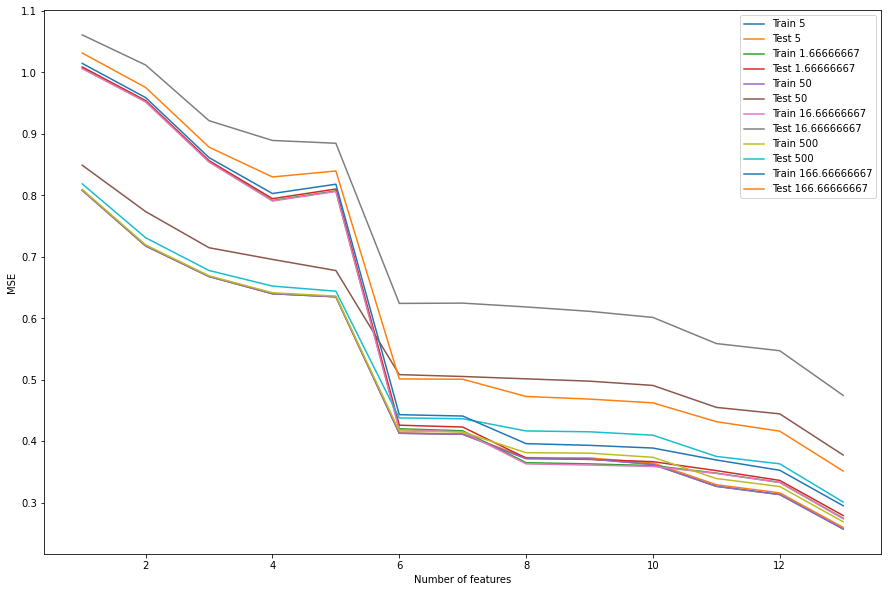

In [13]:
lambd = [5,1.66666667,50,16.66666667,500,166.66666667]
plt.figure(figsize = (15,10))
for feat in range(6):
    sns.lineplot(np.linspace(1,13,13),res.iloc[:,feat],label = "Train "+str(lambd[feat]))
    sns.lineplot(np.linspace(1,13,13),res.iloc[:,feat+6],label = "Test "+str(lambd[feat]))
    plt.xlabel("Number of features")
    plt.ylabel("MSE")
plt.show()

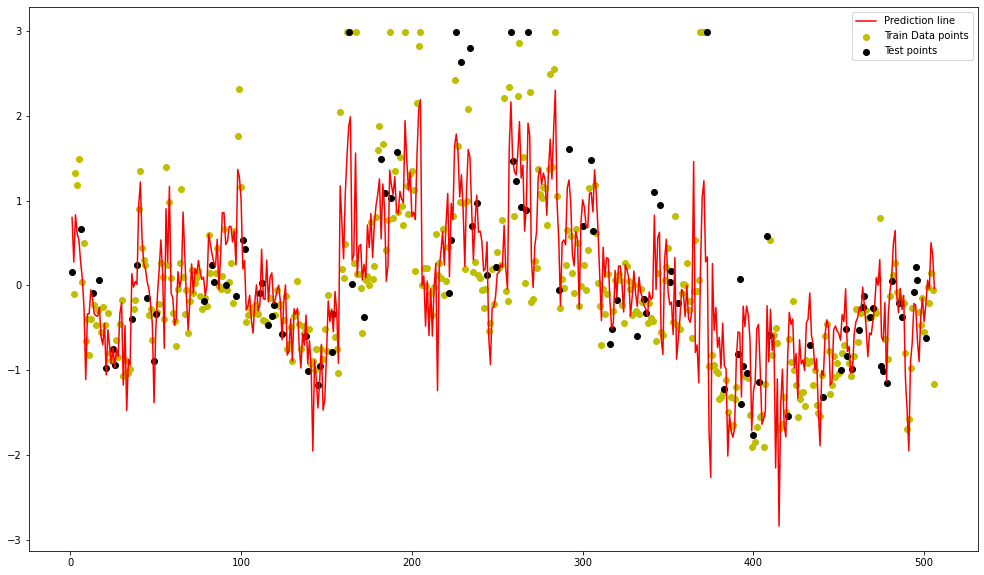

In [14]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
test = list()
train = list()
for feat in range(2,15):
    temp1 = list()
    temp2 = list()
    for alp in [0.001,0.003,0.0001,0.0003,0.00001,0.00003]:
        try:
            model = Lasso(alpha = alp,fit_intercept = False,normalize = False,copy_X = True).fit(X_train.iloc[:,1:feat],Y_train.iloc[:,1:])
            temp1.append(mean_squared_error(model.predict(X_train.iloc[:,1:feat]),Y_train.iloc[:,1:]))
            temp2.append(mean_squared_error(model.predict(X_test.iloc[:,1:feat]),Y_test.iloc[:,1:]))
            plt.cla()
            ax.scatter(X_train["id"],Y_train.iloc[:,1:],c = "y",label = "Train Data points")
            ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
            ax.plot(np.linspace(1,506,506),np.dot(data_norm.iloc[:,1:feat],model.coef_.T),c = "r",label = "Prediction line")
            ax.legend()
            #plt.show()
            display.display(plt.gcf())
            display.clear_output(wait=True)
            #display.display(plt.gcf())  
            time.sleep(0.01)
        except KeyboardInterrupt:
            break
    train.append(temp1)
    test.append(temp2)
    

In [61]:
mylist = list()
for i in range(len(train)):
    temp = list()
    for j in range(6):
        temp.append(train[i][j])
        temp.append(test[i][j])
    mylist.append(temp)
res = pd.DataFrame(mylist)   
res
        

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.808374,1.006093,0.808381,1.006519,0.808374,1.005902,0.808374,1.005944,0.808374,1.005883,0.808374,1.005887
1,0.717784,0.952085,0.717796,0.952462,0.717783,0.951916,0.717783,0.951954,0.717783,0.951900,0.717783,0.951903
2,0.668049,0.854256,0.668062,0.854555,0.668048,0.854124,0.668048,0.854153,0.668048,0.854111,0.668048,0.854113
3,0.640031,0.790811,0.640051,0.791607,0.640028,0.790457,0.640028,0.790535,0.640028,0.790422,0.640028,0.790429
4,0.635003,0.806186,0.635024,0.806842,0.635000,0.805897,0.635000,0.805960,0.635000,0.805868,0.635000,0.805874
5,0.413003,0.418414,0.413025,0.419412,0.413000,0.417971,0.413000,0.418070,0.413000,0.417926,0.413000,0.417936
6,0.411379,0.415005,0.411402,0.416041,0.411376,0.414545,0.411376,0.414646,0.411376,0.414503,0.411376,0.414513
7,0.371742,0.363027,0.371882,0.364663,0.371725,0.362340,0.371726,0.362485,0.371725,0.362272,0.371725,0.362287
8,0.371206,0.361147,0.371346,0.362760,0.371189,0.360469,0.371191,0.360617,0.371189,0.360402,0.371189,0.360417
9,0.362186,0.358875,0.362530,0.359995,0.362143,0.358465,0.362147,0.358551,0.362143,0.358427,0.362143,0.358436


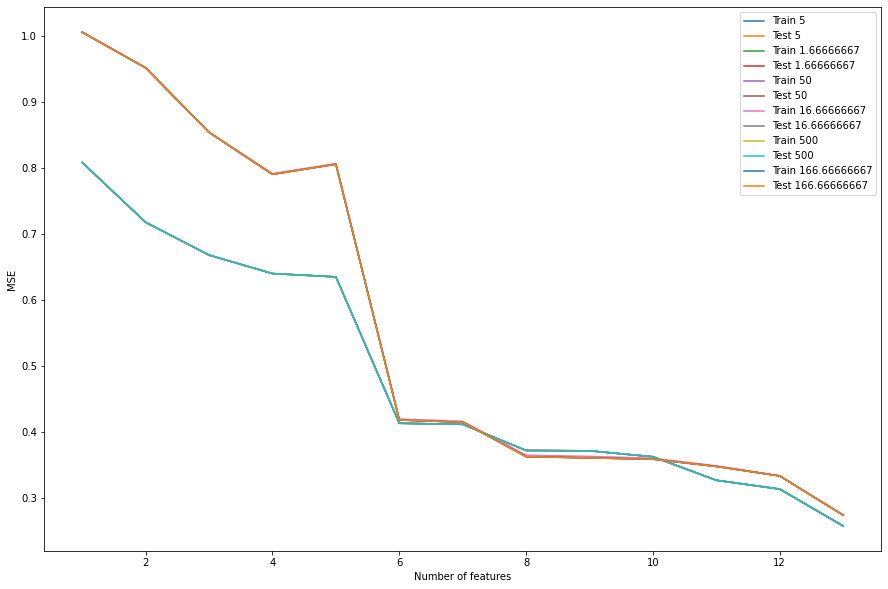

In [62]:
lambd = [5,1.66666667,50,16.66666667,500,166.66666667]
plt.figure(figsize = (15,10))
for feat in range(6):
    sns.lineplot(np.linspace(1,13,13),res.iloc[:,feat],label = "Train "+str(lambd[feat]))
    sns.lineplot(np.linspace(1,13,13),res.iloc[:,feat+6],label = "Test "+str(lambd[feat]))
    plt.xlabel("Number of features")
    plt.ylabel("MSE")
plt.show()

In [59]:
v = 0
beta = 0.92
avg = list()
for i in target_norm.values[:,1]:
    v = (beta*v)+((1-beta)*i)
    avg.append(v)

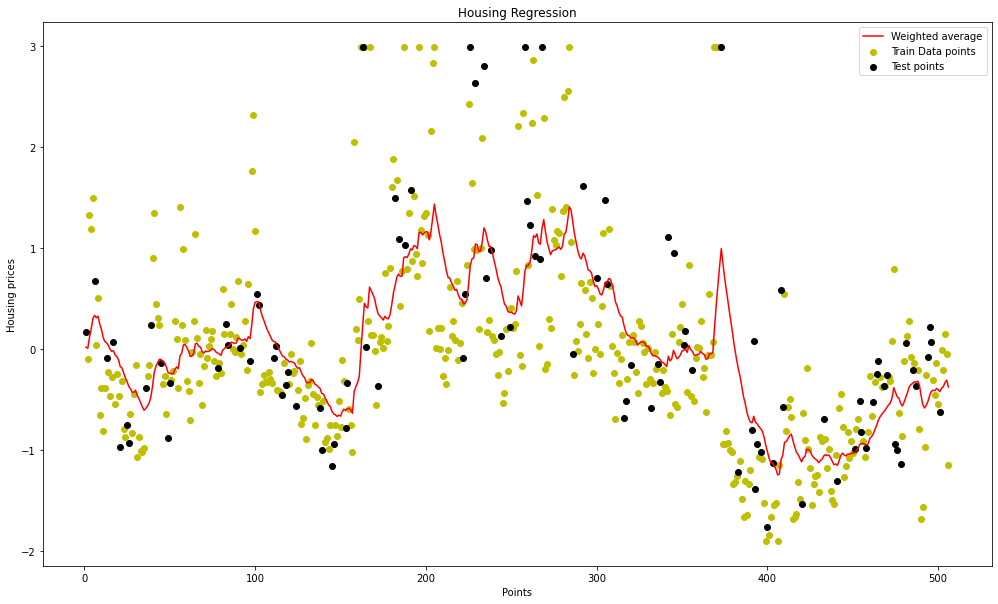

In [60]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
ax.scatter(X_train["id"],Y_train.iloc[:,1:],c = "y",label = "Train Data points")
ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
ax.plot(target_norm.iloc[:,0],avg,c = "r",label = "Weighted average")
ax.legend()

In [68]:
syn_data,syn_targets = make_regression(n_samples = 500,n_features = 5,n_informative = 4,n_targets = 1,shuffle = False)

In [88]:
s_data = pd.DataFrame(syn_data,columns = ["Feature "+str(i) for i in range(5)])
s_data.insert(0,"id",np.linspace(0,500,500).astype(int),True)
s_target =pd.DataFrame(syn_targets,columns = ["Target"])
s_target.insert(0,"id",np.linspace(0,500,500).astype(int),True)

In [89]:
s_data.head()

,id,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4
0,0,0.839159,0.287736,0.096935,-0.026009,-0.148352
1,1,-0.044197,0.565298,-0.130169,-0.273709,-1.337343
2,2,2.329544,-0.674577,-0.769998,0.574777,0.332124
3,3,-0.405999,-0.049339,-0.045930,0.469683,0.449940
4,4,0.099934,-1.374980,-1.426189,0.443110,-1.281762


In [90]:
s_data.describe()

,id,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4
count,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.5020,0.048478,0.079443,0.000854,0.089639,0.075762
std,144.4853,0.983225,1.006667,0.992639,1.057503,1.005758
min,0.0000,-2.883367,-3.115408,-2.686405,-3.588759,-2.757322
25%,124.7500,-0.617107,-0.597414,-0.704665,-0.630883,-0.649143
50%,249.5000,0.021344,0.112844,0.008133,0.086090,0.006603
75%,374.2500,0.714292,0.730527,0.622324,0.818346,0.756745
max,500.0000,2.855659,3.065229,2.680058,2.557694,2.828296


In [91]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         500 non-null    int32  
 1   Feature 0  500 non-null    float64
 2   Feature 1  500 non-null    float64
 3   Feature 2  500 non-null    float64
 4   Feature 3  500 non-null    float64
 5   Feature 4  500 non-null    float64
dtypes: float64(5), int32(1)
memory usage: 21.6 KB


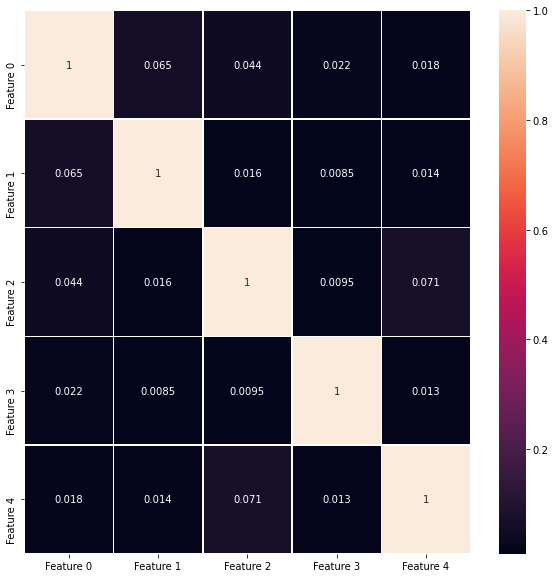

In [93]:
plt.figure(figsize =(10,10))
sns.heatmap(s_data.iloc[:,1:].corr(),linewidth = 0.5,annot = True)

In [104]:
X_train,X_test,Y_train,Y_test = train_test_split(s_data,s_target,test_size = 0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(400, 6) (400, 2)
(100, 6) (100, 2)


Mean squared error on train:  4.547666761615613e-27
Mean squared error on test:  3.993466337718432e-27


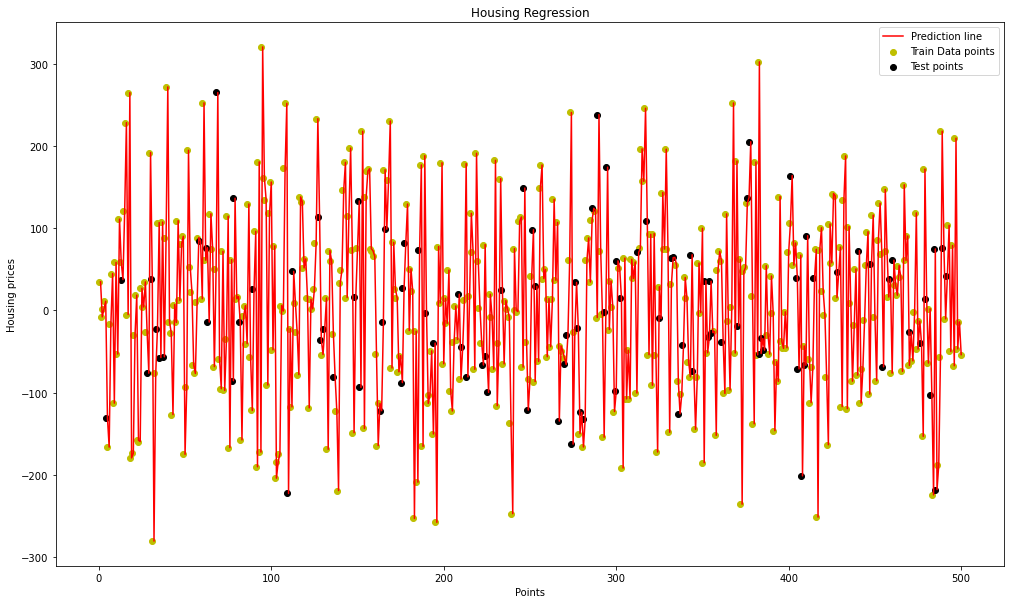

In [107]:
model = LinearRegression(fit_intercept = False,normalize = False,copy_X = True).fit(X_train.iloc[:,1:],Y_train.iloc[:,1:])
print("Mean squared error on train: ",mean_squared_error(model.predict(X_train.iloc[:,1:]),Y_train.iloc[:,1:]))
print("Mean squared error on test: ",mean_squared_error(model.predict(X_test.iloc[:,1:]),Y_test.iloc[:,1:]))
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(111)
ax.plot(np.linspace(1,500,500),np.dot(s_data.iloc[:,1:],model.coef_.T),c = "r",label = "Prediction line")
ax.scatter(X_train["id"],Y_train.iloc[:,1:],c = "y",label = "Train Data points")
ax.scatter(X_test["id"],Y_test.iloc[:,1:],c = "k",label = "Test points")
ax.legend()
#ax.set_xlim(-100,700)
#ax.set_ylim(-30,70)
ax.set_ylabel("Housing prices")
ax.set_xlabel("Points")
plt.title("Housing Regression")
plt.show()